#Relatório 4 - Cálculo Numérico Computacional
##Nome: Guilherme Dallmann Lima
##Matricula: 19200035
##Turma: T2

#Importando as Bibliotecas

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
x = Symbol('x')
y = Symbol('y')
import decimal
import pandas as pd

#Metodos

0.   Trapézio um Segmento e Multiplos Segmentos
1.   Simpson 1/3 e 3/8
2.   Euler
3.   Runge-Kutta de 4ª ordem (RK4)



In [ ]:
def erroAbsoluto(vexato,vaprox):
    erro = np.zeros(len(vexato))

    for i in np.arange(0,len(vaprox)):
        erro[i] = abs(vexato[i] - vaprox[i])

    return erro

def erroRelativoPercentual(vexato,vaprox):
    erro = np.zeros(len(vaprox))

    for i in np.arange(0,len(vaprox)):
        if vaprox[i] != 0:
            erro[i] = abs(vexato[i] - vaprox[i])/abs(vaprox[i]) * 100
        else:
            erro[i] = abs(vexato[i] - vaprox[i])

    return erro

##Trapézio

###Trapézio um Segmento

In [ ]:
def TrapOneSegment(h, f0, f1):
  trap = (h * (f0 + f1))/2
  return trap

###Trapézio Multiplos Segmentos

In [ ]:
def TrapManySegment(h, n, f):
  sum = f[0]
  for i in range(1, n-1):
    sum = sum + 2 * f[i]
  sum = sum + f[n-1]
  trapm = (h * sum) / 2

  return trapm

##Simpson 1/3 e 3/8

###Simp13m

In [ ]:
def Simp13m(h, n, f):
  sum = f[0]
  for i in range(1, n-2, 2):
    sum = sum + 4 * f[i] + 2 * f[i+1]
  sum = sum + 4 * f[n-2] + f[n-1]
  simp13m = (h * sum) / 3
  return simp13m

###Simp13

In [ ]:
def Simp13(h, f0, f1, f2):
  simp13 = 2 * h * (f0+4*f1+f2)/6
  return simp13

###Simp38

In [ ]:
def Simp38(h, f0, f1, f2, f3):
  simp38 = 3 * h * (f0+3*(f1+f2)+f3)/8
  return simp38

###All regras

In [ ]:
def simpInt(a, b, n, f):
  h = (b-a)/n
  if n == 1:
    sum = TrapOneSegment(h, f[n-2], f[n-1])
  else:
    m = n
    odd = (n / 2) - int(n / 2)
    if odd > 0 and n > 1:
      sum = sum + Simp38(h, f[n-3], f[n-2], f[n-1], f[n])
      m = n - 3
    if m > 1:
      sum = sum + Simp13m(h, m, f)
    simpInt = sum
    return sum

##Euler

In [ ]:
def euler(a, b, y0, m, func):
  vetX = [0]*m
  vetY = [0]*m
  h = (b - a) / m
  x = a
  y = y0

  vetX[0] = x
  vetY[0] = y

  fxy = func(a, y)

  print("i\tx\ty\tx²+y²")
  print(f"0\t%.4f\t%.4f\t%.4f"%(x, y, fxy))


  for i in range (1, m):
    x = a + (i) * h
    y = y + h * fxy
    fxy = func(x, y) # avaliar f(x, y) em x = xi e y = yi

    vetX[i] = x
    vetY[i] = y
    print(f"%.0f\t%.4f\t%.4f\t%.4f"%(i, x, y, fxy))

  return vetX, vetY

## Runge-Kutta de 4ª ordem (RK4)

In [ ]:
def rungekutta4(func, x0, y0, h, num_steps, flag=None):
    xs = [x0]
    ys = [y0]
    ks = [[0] * (num_steps) for _ in range(4)] # matriz com os valores de k1, k2, k3 e k4

    for i in range(num_steps):
        t = xs[-1]
        y = ys[-1]

        ks[0][i] = h * func(t, y)
        ks[1][i] = h * func(t + h/2, y + ks[0][i]/2)
        ks[2][i] = h * func(t + h/2, y + ks[1][i]/2)
        ks[3][i] = h * func(t + h, y + ks[2][i])

        y_next = y + (ks[0][i] + 2*ks[1][i] + 2*ks[2][i] + ks[3][i])/6
        x_next = t + h

        xs.append(x_next)
        ys.append(y_next)

    if flag:
      print("I\tT\tY\tK1\tK2\tK3\tK4")
      for i in range(0, num_steps):
         ks[0][i] = ks[0][i] * 10
         ks[1][i] = ks[1][i] * 10
         ks[2][i] = ks[2][i] * 10
         ks[3][i] = ks[3][i] * 10
         print(f"{i}\t{xs[i]:.4f}\t{ys[i]:.4f}\t{ks[0][i]:.4f}\t{ks[1][i]:.4f}\t{ks[2][i]:.4f}\t{ks[3][i]:.4f}")
         #t[i] = t[i+1]

    return xs, ys, ks




#Questões

##1. O trabalho realizado por uma força F(x) cujo ângulo entre a direção do movimento e a força é dado por θ(x), pode ser obtido pela seguinte fórmula:
\begin{align*}
W = 1 = \int_{i_0}^{i_n} F(i)cos(\theta(i)) \,
\end{align*}

##Em que $x_0$ e $x_n$ são as posições inicial e final, respectivamente.

##Calcule a melhor aproximação ao trabalho realizado, W, ao puxar um bloco da posição 0 até à posição 30 sabendo que a força aplicada e o ângulo usado são dados na tabela seguinte.

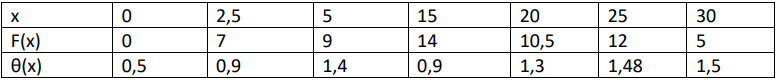

##Observação: Verificam-se 3 grupos de espaçamentos distintos.

VETORES

In [ ]:
x = np.array([0, 2.5, 5, 15, 20, 25, 30], dtype="double")
fx = np.array([0, 7, 9, 14, 10.5, 12, 5], dtype="double")
tetax = np.array([0.5, 0.9, 1.4, 0.9, 1.3, 1.48, 1.5], dtype="double")

###a) Aplicar o Método de 1/3 de Simpson Repetido no Grupo 1, o qual possui 2 subintervalos, h = 2,5.

In [ ]:
# 0 - 2,5 - 5
h = 2.5

func = lambda x, y : x * math.cos(y)

f0 = func(fx[0], tetax[0])
f1 = func(fx[1], tetax[1])
f2 = func(fx[2], tetax[2])

r1 = Simp13(h, f0, f1, f2)
print(r1)

15.778986164733977


###b) Aplicar o Método do Trapézio Repetido no Grupo 2, o qual possui 1 subintervalo, h = 10.

In [ ]:
# 5 - 15
# pode usar simpson repetido nSubint = 1 ou simpson simples
h = 10
f0 = func(fx[2], tetax[2])
f1 = func(fx[3], tetax[3])

r2 = TrapOneSegment(h, f0, f1)
print(r2)

51.16121920945736


###c) Aplicar o Método do 3/8 Simpson Repetido no Grupo 3, o qual possui 3 subintervalos, h = 5.

In [ ]:
# 15 - 20 - 25 - 30

h = 5
f0 = func(fx[3], tetax[3])
f1 = func(fx[4], tetax[4])
f2 = func(fx[5], tetax[5])
f3 = func(fx[6], tetax[6])

r3 = Simp38(h, f0, f1, f2, f3)

print(r3)

38.89990714972025


###$W = R1+R2+R3$

In [ ]:
w = r1+r2+r3

print("A melhor aproximação ao trabalho realizado puxando o bloco da posição até a posição 30, é de: ", w)
print(f"Onde: W = R1 + R2 + R3\nOs respectivos Ri's foram calculados a partir das regras de Simpson1/3, Trapézio de um segmento e Simpson3/8" )
print(f"Onde: W = %.2f + %.2f + %.2f " % (r1, r2, r3))



A melhor aproximação ao trabalho realizado puxando o bloco da posição até a posição 30, é de:  105.84011252391159
Onde: W = R1 + R2 + R3
Os respectivos Ri's foram calculados a partir das regras de Simpson1/3, Trapézio de um segmento e Simpson3/8
Onde: W = 15.78 + 51.16 + 38.90 


##2. Para o problema de valor inicial

\begin{align}
  \left\{
  \begin{array}{cl}
  y' = x² + y² \\
  y(0) = 0
  \end{array}
  \right.
\end{align}

###a)Calcule y(0,5) usando o Método de Euler e Método de Runge-Kutta de 4ª ordem. Considere h = 0,1.

In [ ]:
h = 0.1
m = 5
x0 = 0
y0 = 0
funcao = lambda x, y : x**2 + y**2

print("REGRA DE EULER")
vetX, vetY = euler(0, 0.5, y0, 5, funcao)
print("R:", vetY[m-1])

print("\n")
print("\n")
print("REGRA RUNGE-KUTTA 4° Ordem")
xs, ys, ks = rungekutta4(funcao, x0, y0, h, m, True)
print("R:", ys[m-1])

REGRA DE EULER
i	x	y	x²+y²
0	0.0000	0.0000	0.0000
1	0.1000	0.0000	0.0100
2	0.2000	0.0010	0.0400
3	0.3000	0.0050	0.0900
4	0.4000	0.0140	0.1602
R: 0.014002600100001004




REGRA RUNGE-KUTTA 4° Ordem
I	T	Y	K1	K2	K3	K4
0	0.0000	0.0000	0.0000	0.0025	0.0025	0.0100
1	0.1000	0.0003	0.0100	0.0225	0.0225	0.0400
2	0.2000	0.0027	0.0400	0.0625	0.0625	0.0901
3	0.3000	0.0090	0.0901	0.1227	0.1227	0.1605
4	0.4000	0.0214	0.1605	0.2034	0.2035	0.2517
R: 0.021359447327141873


###b) Compare os resultado obtidos na letra a com a solução exata do problema.

Os métodos de Euler e Runge-Kutta são usados para resolver equações diferenciais ordinárias, mas diferem em sua abordagem para calcular a solução.

O método de Euler é um método de primeira ordem que usa uma expansão linear para aproximar a solução. Ele é simples e fácil de implementar, mas pode ter precisão limitada para equações complexas ou com soluções oscilatórias.

O método de Runge-Kutta é um método de alta ordem que usa uma combinação de fórmulas para melhorar a precisão da solução. Ele é mais complexo e exige mais cálculos do que o método de Euler, mas geralmente produz resultados mais precisos.

Comparando matematicamente, podemos observar que o método de Euler usa apenas uma única inclinação para estimar o próximo valor da solução, enquanto o método de Runge-Kutta usa quatro inclinações ponderadas para obter uma estimativa mais precisa. Isso é representado pelas seguintes fórmulas:


Método de Euler:

y[i+1] = y[i] + h * f(x[i], y[i])


Método de Runge-Kutta de 4ª ordem:

k1 = h * f(x[i], y[i])

k2 = h * f(x[i] + h/2, y[i] + k1/2)

k3 = h * f(x[i] + h/2, y[i] + k2/2)

k4 = h * f(x[i] + h, y[i] + k3)

y[i+1] = y[i] + (k1 + 2k2 + 2k3 + k4) / 6


Assim, podemos concluir que o método de Runge-Kutta produz resultados mais precisos devido à sua maior ordem e ao uso de múltiplas inclinações ponderadas para estimar a solução. No entanto, também é mais computacionalmente intensivo do que o método de Euler.

##3. Para o problema de valor inicial

\begin{align}
  \left\{
  \begin{array}{cl}
  y' = x + y \\
  y(0) = 1
  \end{array}
  \right.
\end{align}

###a) Calcule y(0,2) usando o Método de Runge-Kutta de 4ª ordem. Considere     
###h = 0,1 e h = 0,2.

In [ ]:
h1 = 0.1
x0 = 0
y0 = 1
m = 2
func = lambda x, y : x + y
#def rungekutta4(func, x0, y0, h, num_steps, flag=None)
print("\n")
print("REGRA RUNGE-KUTTA 4° Ordem - H = 0.1")

xs1, ys1, ks1 = rungekutta4(func, x0, y0, 0.1, m, True)
print(f"R: {ys1[m-1]}")
print("\n")

print("REGRA RUNGE-KUTTA 4° Ordem - H = 0.2")
h2 = 0.2
xs2, ys2, ks2 = rungekutta4(func, x0, y0, 0.2, m, True)
print(f"R: {ys2[m-1]}")



REGRA RUNGE-KUTTA 4° Ordem - H = 0.1
I	T	Y	K1	K2	K3	K4
0	0.0000	1.0000	1.0000	1.1000	1.1050	1.2105
1	0.1000	1.1103	1.2103	1.3209	1.3264	1.4430
R: 1.1103416666666668


REGRA RUNGE-KUTTA 4° Ordem - H = 0.2
I	T	Y	K1	K2	K3	K4
0	0.0000	1.0000	2.0000	2.4000	2.4400	2.8880
1	0.2000	1.2428	2.8856	3.3742	3.4230	3.9702
R: 1.2428


###b) Compare os resultados obtidos na letra a com a solução exata do problema

####Apresentação dos valores para fins comparativos

In [ ]:
h = 0.1
#step = int(y0/h)
fExato = lambda x: x + (x ** 2 / 2)
vExatos = []

for i in np.arange(x0, y0, h):
    vExatos.append(fExato(i))

erroRelPer1 = erroRelativoPercentual(vExatos, ys1)
erroAbs1 = erroAbsoluto(vExatos, ys1)

print("h = 0.1")
table1 = pd.DataFrame({'valorExato': vExatos[0:2], 'valorAproximado': ys1[0:2], 'erroAbsoluto': erroAbs1[0:2], 'erroPercentual': erroRelPer1[0:2]})
print(table1)

h = 0.2
#step = int(y0/h)
for i in np.arange(x0, y0, h):
    vExatos.append(fExato(i))

erroRelPer2 = erroRelativoPercentual(vExatos, ys2)
erroAbs2 = erroAbsoluto(vExatos, ys2)


print("\n\nh = 0.2")
table2 = pd.DataFrame({'valorExato': vExatos[0:2], 'valorAproximado': ys2[0:2], 'erroAbsoluto': erroAbs2[0:2], 'erroPercentual': erroRelPer2[0:2]})
print(table2)


h = 0.1
   valorExato  valorAproximado  erroAbsoluto  erroPercentual
0       0.000         1.000000      1.000000      100.000000
1       0.105         1.110342      1.005342       90.543451


h = 0.2
   valorExato  valorAproximado  erroAbsoluto  erroPercentual
0       0.000           1.0000        1.0000      100.000000
1       0.105           1.2428        1.1378       91.551336


Para  verificar se o método está produzindo uma solução razoável é verificando se o erro diminui quando diminuímos o tamanho do passo. Em geral, espera-se que o erro diminua proporcionalmente ao quadrado do tamanho do passo. Como apresentado os valores do erro absoluto e erro percentual ao diminuir o passo de 0.2 para 0.1 é verificado que o valor está diminuindo proporcionalmente aos passos, oque indica que o método está produzindo uma solução razóavel.
